In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import os
import fmpy
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')
plt.rcParams["font.family"] = "Times New Roman"

In [17]:
folder = 'C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/data/Italian case-study'
file = 'Office buildingKTH.xlsx'
file_path = os.path.join(folder, file)

elec_data = pd.read_excel(file_path, usecols=['TOT-Total Electricity Demand', 'Electricity Demand-TOT Heating',
                                            'Electricity Demand-TOT Cooling', 'Electricity Demand-TOT Electric Equipment',
                                            'Electricity Demand-TOT Lighting', 'Thermal energy need for space cooling [kWh]',
                                            'Thermal power requirement for space cooling [kW]', 'Hour_of_the_day          ',
                                             ' TIME                    '], sheet_name='Offices')
elec_data = elec_data.iloc[1: , :]
elec_data.dropna(inplace=True)

index = pd.date_range('2021-01-01 00:00:00', '2022-01-01 00:00:00', freq='15T')
elec_data.index = index

elec_data.to_pickle('./office_load.pkl')

In [18]:
folder = 'C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/data/Italian case-study'
file = 'Office buildingKTH.xlsx'
file_path = os.path.join(folder, file)

elec_data = pd.read_excel(file_path, usecols=['ArrayPower     ', 'PV electricity production',
                                             'self consumption', '% self consumption', ' TIME   '], sheet_name='PV_OFFICE')
elec_data = elec_data.iloc[1:-1, :]
elec_data.dropna(inplace=True)

index = pd.date_range('2021-01-01 00:00:00', '2022-01-01 00:00:00', freq='15T')
elec_data.index = index

elec_data.to_pickle('./office_pv.pkl')

In [19]:
folder = 'C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/data/Italian case-study'
file = 'Building results and climate.xlsx'
file_path = os.path.join(folder, file)

building_results = pd.read_excel(file_path, sheet_name='Results and Data') 
building_results = building_results.iloc[1: , :] 
building_results.dropna(inplace=True)

index = pd.date_range('2021-01-01 00:00:00', '2022-01-01 00:00:00', freq='15T')
building_results.index = index

display(building_results) 
building_results.to_pickle('./building_results.pkl')

,Simulation_month,Day_of_the_month,Hour_of_the_day,TIME,TAIR_Office1,TOP_Office1,QINF_Office1,RELHUM_Office1,QSOLTR_Office1,QTABSI_Office1,...,TAIR_Office8,TOP_Office8,QINF_Office8,RELHUM_Office8,QSOLTR_Office8,QTABSI_Office8,QTABSO_Office8,TMSURF_Office8,T,W
2021-01-01 00:00:00,0,0,0,0,20,20,0,50,0,0,...,20,20,0,50,0,0,0,20,9.1,0.5
2021-01-01 00:15:00,1,1,1,0.25,19.252351,19.378832,-777.123937,52.293525,0,0.0,...,19.712825,19.726053,-834.105983,50.875877,0,-0.0,0.0,19.739281,9.825,0.6625
2021-01-01 00:30:00,1,1,1,0.5,18.720431,19.035979,-561.201106,54.096283,0,-0.0,...,19.449949,19.564918,-643.161116,51.719431,0,-0.0,0.0,19.679888,11.275,0.9875
2021-01-01 00:45:00,1,1,1,0.75,19.026998,19.258508,-456.556048,53.406684,0,-0.0,...,19.521814,19.624779,-508.560231,51.579591,0,0.0,-0.0,19.727743,12.725,1.3125
2021-01-01 01:00:00,1,1,1,1,19.214795,19.400876,-351.220837,53.279139,0,0.0,...,19.613817,19.696045,-389.733366,51.432851,0,-0.0,0.0,19.778273,14.175,1.6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:00:00,12,31,23,8759,12.198032,12.244213,-106.003405,88.657419,0,0.0,...,9.611301,9.613093,0.966636,100,0,0.0,-0.0,9.614885,9.7,0.3375
2021-12-31 23:15:00,12,31,24,8759.25,12.178705,12.229401,-115.019757,88.031618,0,0.0,...,9.605856,9.608249,-0.685314,100,0,0.0,-0.0,9.610643,9.5375,0.325
2021-12-31 23:30:00,12,31,24,8759.5,12.162552,12.217143,-122.673849,87.361792,0,0.0,...,9.601636,9.604498,-2.690735,100,0,-0.0,0.0,9.60736,9.4125,0.375
2021-12-31 23:45:00,12,31,24,8759.75,12.147658,12.205734,-130.654444,86.675685,0,-0.0,...,9.597677,9.600916,-5.433488,100,0,-0.0,0.0,9.604155,9.2875,0.425


In [20]:
office_elec = pd.read_pickle('./office_load.pkl')
building_results = pd.read_pickle('./building_results.pkl')

In [21]:
building_results['avetemp'] = (building_results['TAIR_Office1             '] + building_results['TAIR_Office2             '] +
                             building_results['TAIR_Office3             '] + building_results['TAIR_Office4             '] +
                             building_results['TAIR_Office5             '] + building_results['TAIR_Office6             '] +
                             building_results['TAIR_Office7             '] + building_results['TAIR_Office8             ']) / 8

In [22]:
office_elec_cs = office_elec[(office_elec.index.month==6) | (office_elec.index.month==7) | (office_elec.index.month==8)]
building_results_cs = building_results[(building_results.index.month==6) | (building_results.index.month==7) | (building_results.index.month==8)]

# calculate the average value at each hours of a day
mean_per_minute_elec = office_elec_cs.groupby([office_elec_cs.index.hour, office_elec_cs.index.minute]).mean()
mean_per_minute_temp = building_results_cs.groupby([building_results_cs.index.hour, building_results_cs.index.minute]).mean()

In [23]:
display(office_elec_cs)

,Hour_of_the_day,TIME,TOT-Total Electricity Demand,Electricity Demand-TOT Heating,Electricity Demand-TOT Cooling,Electricity Demand-TOT Electric Equipment,Electricity Demand-TOT Lighting,Thermal energy need for space cooling [kWh],Thermal power requirement for space cooling [kW]
2021-06-01 00:00:00,24,3624,0,0,0,0,0,0,0
2021-06-01 00:15:00,1,3624.25,0,0,0,0,0,0,0
2021-06-01 00:30:00,1,3624.5,0,0,0,0,0,0,0
2021-06-01 00:45:00,1,3624.75,0,0,0,0,0,0,0
2021-06-01 01:00:00,1,3625,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2021-08-31 22:45:00,23,5830.75,0,0,0,0,0,0,0
2021-08-31 23:00:00,23,5831,0,0,0,0,0,0,0
2021-08-31 23:15:00,24,5831.25,0,0,0,0,0,0,0
2021-08-31 23:30:00,24,5831.5,0,0,0,0,0,0,0


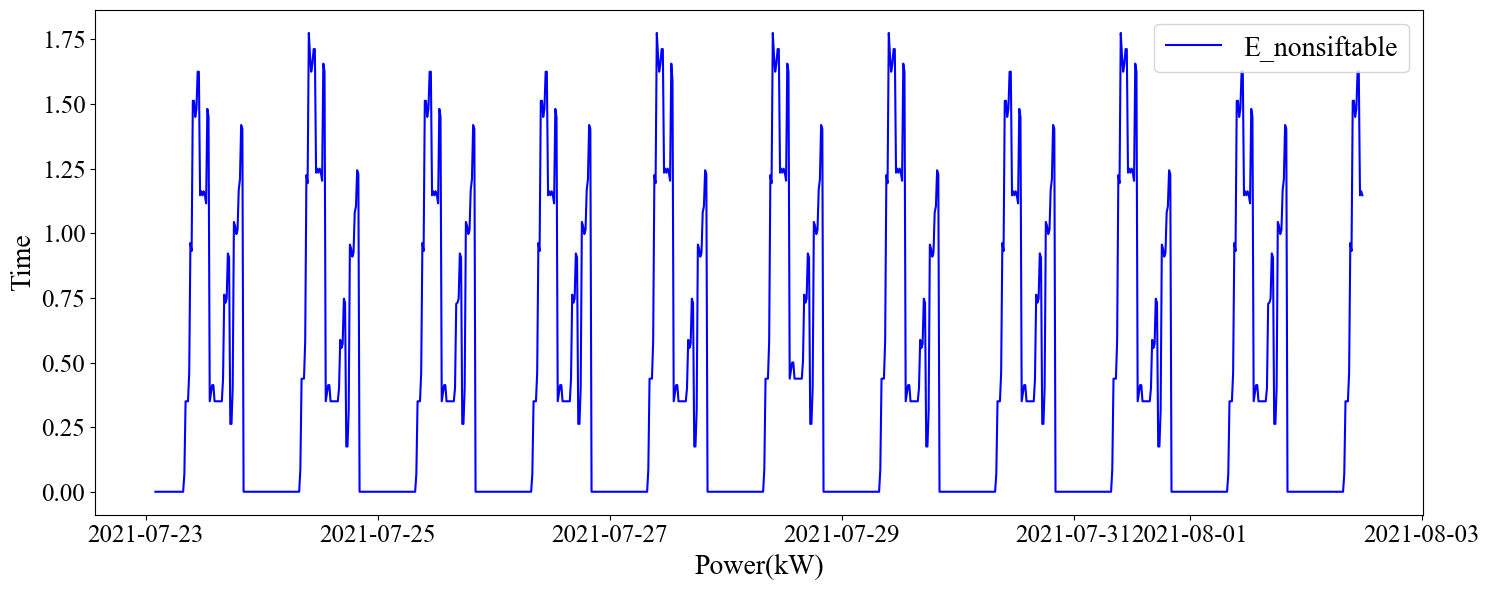

In [24]:
plt.figure(figsize=(15, 6))

plt.plot(office_elec_cs.index[5000:6000], office_elec_cs['Electricity Demand-TOT Electric Equipment'][5000:6000] + office_elec_cs['Electricity Demand-TOT Lighting'][5000:6000], 
         color='blue', label='E_nonsiftable')
#plt.plot(office_elec_cs.index[5000:6000], office_elec_cs['Electricity Demand-TOT Cooling'][5000:6000], 
         #color='r', label='E_cooling')

plt.xlabel('Power(kW)', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)


plt.tight_layout()
plt.savefig('C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/figs/nonshift.jpg', dpi=500)
plt.show()

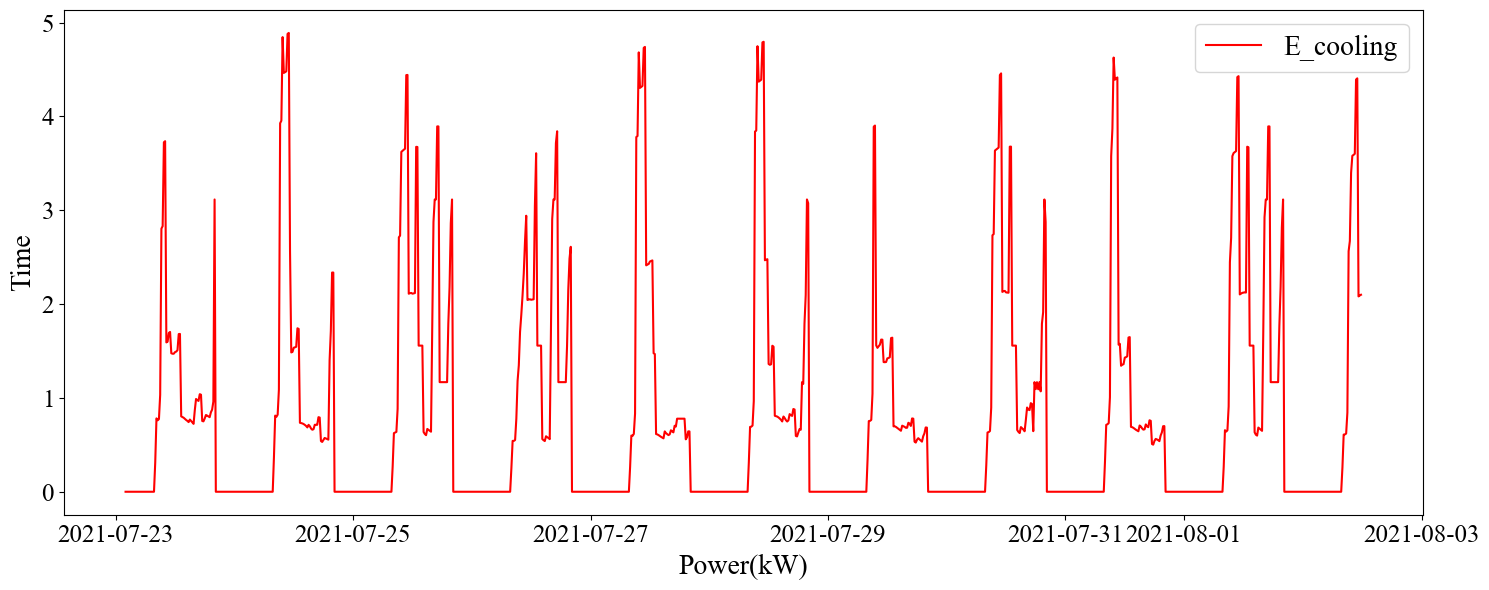

In [25]:
plt.figure(figsize=(15, 6))

#plt.plot(office_elec_cs.index[5000:6000], office_elec_cs['Electricity Demand-TOT Electric Equipment'][5000:6000] + office_elec_cs['Electricity Demand-TOT Lighting'][5000:6000], 
         #color='blue', label='E_nonsiftable')
plt.plot(office_elec_cs.index[5000:6000], office_elec_cs['Electricity Demand-TOT Cooling'][5000:6000], 
         color='r', label='E_cooling')

plt.xlabel('Power(kW)', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)


plt.tight_layout()
plt.savefig('C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/figs/shift.jpg', dpi=500)
plt.show()

In [22]:
def SEC_cal(thermal_load, appliance_load):
    COV = thermal_load.cov(appliance_load)
    sigma_1 = thermal_load.std()
    sigma_2 = appliance_load.std()
    
    SEC = COV / (sigma_1 * sigma_2)
    
    return SEC

In [24]:
nonshiftable_load = office_elec_cs['Electricity Demand-TOT Cooling'] + office_elec_cs['Electricity Demand-TOT Lighting']
SEC_orig = SEC_cal(office_elec_cs['Electricity Demand-TOT Cooling'], nonshiftable_load)
print(SEC_orig)

0.9821192505554476


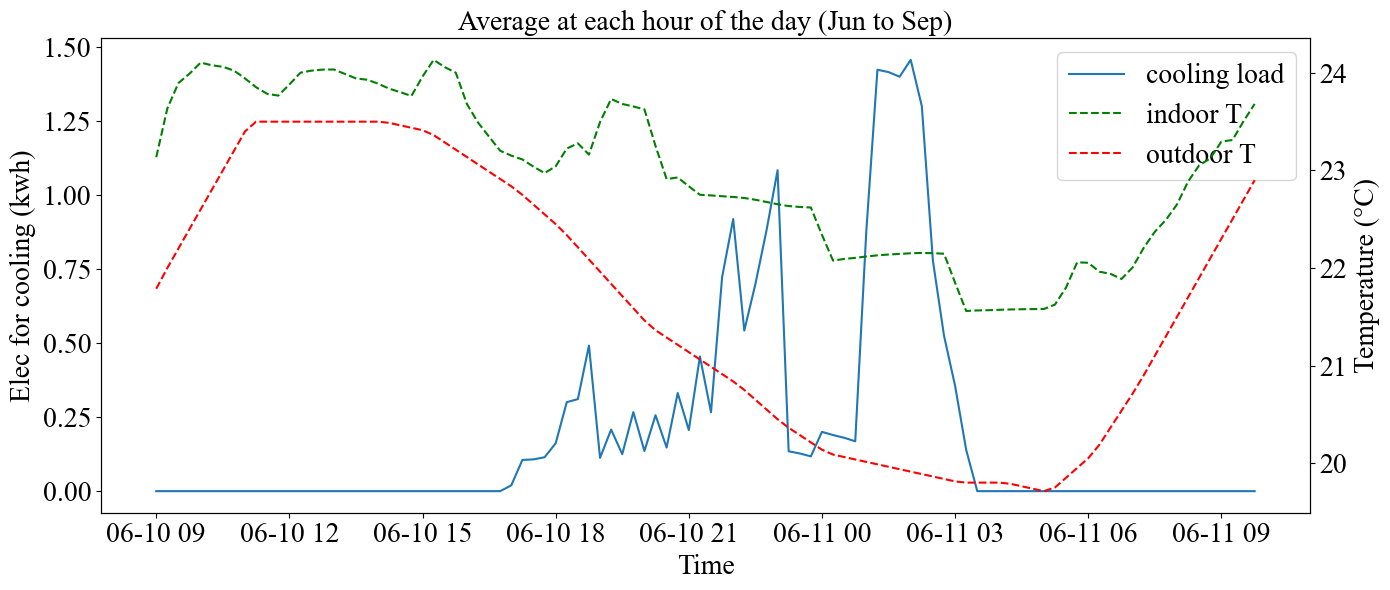

In [5]:
time_index = pd.date_range('00:00', '23:45', freq='15min')
mean_per_minute_elec.index = time_index
mean_per_minute_temp.index = time_index

fig, ax1 = plt.subplots(figsize=(14, 6))

lns1 = ax1.plot(office_elec_cs.index[900:1000], 
                office_elec_cs['Electricity Demand-TOT Cooling'][0:100], label='cooling load')
ax1.set_ylabel('Elec for cooling (kwh)', labelpad=5, fontsize=20)

ax2 = ax1.twinx()
lns3 = ax2.plot(building_results_cs.index[900:1000], building_results_cs['avetemp'][900:1000], 
                label='indoor T', color='green', linestyle='--')
lns2 = ax2.plot(building_results_cs.index[900:1000], building_results_cs['T                        '][900:1000], 
                label='outdoor T', color='red', linestyle='--')
ax2.set_ylabel('Temperature (°C)', labelpad=5, fontsize=20)

leg = lns1 + lns3 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, fontsize=20)

ax1.set_title('Average at each hour of the day (Jun to Sep)', fontsize=20)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.tight_layout()
#plt.savefig('C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/figs/cooling_season.jpg', dpi=500)
plt.show()

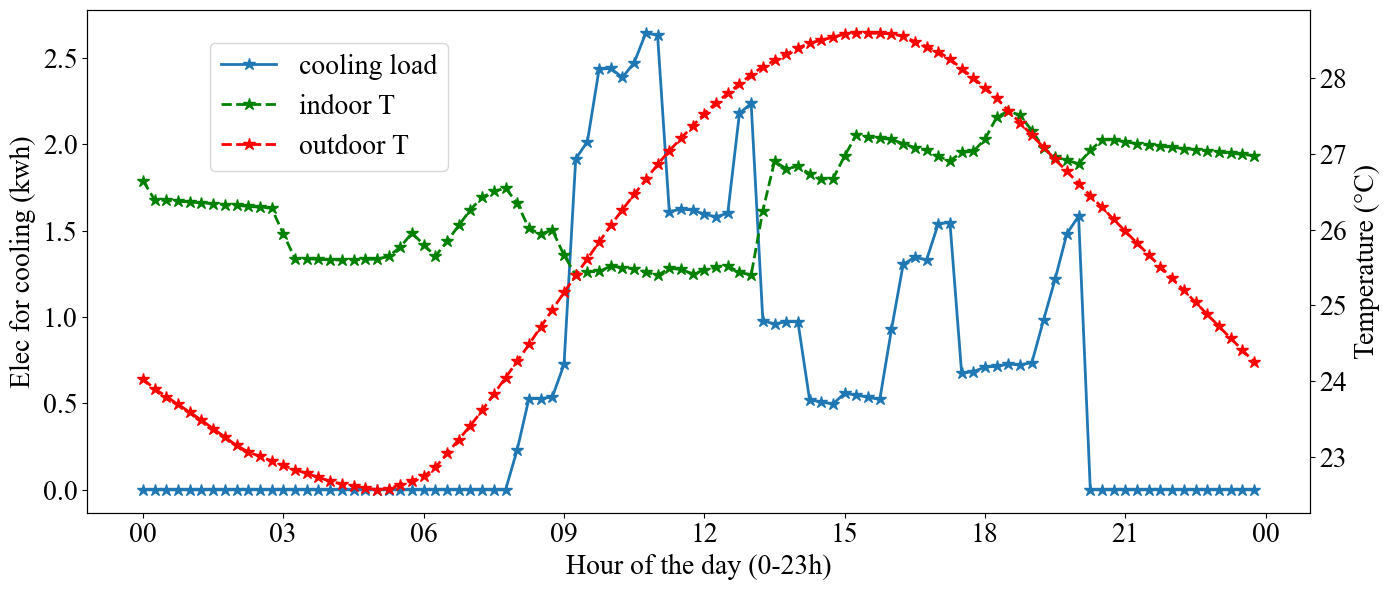

In [26]:
time_index = pd.date_range('00:00', '23:45', freq='15min')
mean_per_minute_elec.index = time_index
mean_per_minute_temp.index = time_index

fig, ax1 = plt.subplots(figsize=(14, 6))

lns1 = ax1.plot(mean_per_minute_elec.index, 
                mean_per_minute_elec['Electricity Demand-TOT Cooling'], label='cooling load', linewidth=2, marker='*', markersize='9')
ax1.set_ylabel('Elec for cooling (kwh)', labelpad=5, fontsize=20)

ax2 = ax1.twinx()
lns3 = ax2.plot(mean_per_minute_temp.index, mean_per_minute_temp['avetemp'], 
                label='indoor T', color='green', linestyle='--', linewidth=2, marker='*', markersize='9')
lns2 = ax2.plot(mean_per_minute_temp.index, mean_per_minute_temp['T                        '], 
                label='outdoor T', color='red', linestyle='--', linewidth=2, marker='*', markersize='9')
ax2.set_ylabel('Temperature (°C)', labelpad=5, fontsize=20)

myFmt = mdates.DateFormatter('%H')
ax1.xaxis.set_major_formatter(myFmt)

leg = lns1 + lns3 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, fontsize=20, loc=[0.1, 0.68])

ax1.set_xlabel('Hour of the day (0-23h)', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.savefig('C:/Users/yangzhec/OneDrive - KTH/Paper with CNR/figs/daily_ave.jpg', dpi=500)
plt.show()